<span style="font-size:30px; font-family:'Times new roman';">
Import Data 🎒
</span>

In [170]:
import pandas as pd
from IPython.display import display
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [171]:
nvda = pd.read_csv("../data/options_nvda.csv")
spy = pd.read_csv("../data/options_spy.csv")

<span style="font-size:30px; font-family:'Times new roman';">
Explore Data 🤯
</span>

In [172]:
# Log data and observe
display(nvda.info())
display(nvda.head())
display(spy.info())
display(spy.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 488 entries, 0 to 487
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contractSymbol     488 non-null    object 
 1   lastTradeDate      488 non-null    object 
 2   strike             488 non-null    float64
 3   lastPrice          488 non-null    float64
 4   bid                488 non-null    float64
 5   ask                488 non-null    float64
 6   change             488 non-null    float64
 7   percentChange      488 non-null    float64
 8   volume             482 non-null    float64
 9   openInterest       488 non-null    int64  
 10  impliedVolatility  488 non-null    float64
 11  inTheMoney         488 non-null    bool   
 12  contractSize       488 non-null    object 
 13  currency           488 non-null    object 
 14  type               488 non-null    object 
 15  expiry             488 non-null    object 
 16  spot               488 non

None

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield
0,NVDA250411C00050000,2025-04-04 19:33:27+00:00,50.0,45.51,46.25,45.00,-7.610001,-14.326056,159.0,145,3.680665,True,REGULAR,USD,call,2025-04-11,94.309998,0.04
1,NVDA250411C00055000,2025-04-04 18:42:02+00:00,55.0,39.20,41.25,42.10,-7.599998,-16.239313,54.0,221,3.818360,True,REGULAR,USD,call,2025-04-11,94.309998,0.04
2,NVDA250411C00060000,2025-04-04 19:40:48+00:00,60.0,35.95,36.30,35.05,-6.049999,-14.404760,171.0,652,2.824222,True,REGULAR,USD,call,2025-04-11,94.309998,0.04
3,NVDA250411C00065000,2025-04-04 18:35:20+00:00,65.0,30.20,31.35,30.10,-7.349998,-19.573896,34.0,623,2.452152,True,REGULAR,USD,call,2025-04-11,94.309998,0.04
4,NVDA250411C00070000,2025-04-04 19:57:18+00:00,70.0,25.00,26.45,27.35,-6.850000,-21.507065,125.0,278,2.549808,True,REGULAR,USD,call,2025-04-11,94.309998,0.04


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1116 entries, 0 to 1115
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   contractSymbol     1116 non-null   object 
 1   lastTradeDate      1116 non-null   object 
 2   strike             1116 non-null   float64
 3   lastPrice          1116 non-null   float64
 4   bid                1116 non-null   float64
 5   ask                1116 non-null   float64
 6   change             1116 non-null   float64
 7   percentChange      1116 non-null   float64
 8   volume             1095 non-null   float64
 9   openInterest       1116 non-null   int64  
 10  impliedVolatility  1116 non-null   float64
 11  inTheMoney         1116 non-null   bool   
 12  contractSize       1116 non-null   object 
 13  currency           1116 non-null   object 
 14  type               1116 non-null   object 
 15  expiry             1116 non-null   object 
 16  spot               1116 

None

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield
0,SPY250411C00375000,2025-04-04 14:46:33+00:00,375.0,138.99,130.40,132.05,-23.649994,-14.541314,70.0,150,1.272953,True,REGULAR,USD,call,2025-04-11,505.279999,1.28
1,SPY250411C00380000,2025-04-04 19:51:15+00:00,380.0,129.11,125.38,127.83,-33.069992,-20.390920,3.0,19,1.304447,True,REGULAR,USD,call,2025-04-11,505.279999,1.28
2,SPY250411C00395000,2025-03-13 14:08:48+00:00,395.0,125.87,109.65,112.97,-35.790000,-22.139057,4.0,0,1.100346,True,REGULAR,USD,call,2025-04-11,505.279999,1.28
3,SPY250411C00400000,2025-04-04 19:54:04+00:00,400.0,107.39,104.75,107.78,-68.490005,-38.941326,21.0,2,1.044438,True,REGULAR,USD,call,2025-04-11,505.279999,1.28
4,SPY250411C00410000,2025-03-13 20:01:01+00:00,410.0,142.58,95.01,98.32,0.000000,0.000000,NaN,0,1.019292,True,REGULAR,USD,call,2025-04-11,505.279999,1.28


In [173]:
# change Expiry type to datetime for checking it with conditions
nvda['expiry'] = pd.to_datetime(nvda['expiry'])
spy['expiry'] = pd.to_datetime(spy['expiry'])

In [174]:
# core features correction check
display(nvda[(nvda['bid'] < 0) | (nvda['ask'] < 0)]) # check any rows have bid or ask price less than 0
display(nvda[(nvda['expiry']) < datetime.today()]) # check any expiry date have been passed today
display(nvda[(nvda['impliedVolatility']) < 0]) # check any rows have implied volatility less than 0
display(spy[(spy['bid'] < 0) | (spy['ask'] < 0)])
display(spy[(spy['expiry']) < datetime.today()])
display(spy[(spy['impliedVolatility']) < 0])

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,impliedVolatility,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield


In [ ]:
# add mid price column to represent average price of each option contract
nvda['AveragePrice'] = (nvda['bid'] + nvda['ask']) / 2
spy['AveragePrice'] = (spy['bid'] + spy['ask']) / 2

In [176]:
# added time to maturity column (in # of days / 365)
def calculateTimeToMaturity(e):
    return max((e - datetime.today()).days / 365, 0)

nvda['ttm'] = nvda['expiry'].apply(calculateTimeToMaturity)
spy['ttm'] = spy['expiry'].apply(calculateTimeToMaturity)

In [177]:
display(nvda.iloc[:5, [2,4,5,18,19]])
display(spy.iloc[-5:, [2,4,5,18,15,19]])

,strike,bid,ask,AveragePrice,ttm
0,50.0,46.25,45.00,45.625,0.010959
1,55.0,41.25,42.10,41.675,0.010959
2,60.0,36.30,35.05,35.675,0.010959
3,65.0,31.35,30.10,30.725,0.010959
4,70.0,26.45,27.35,26.900,0.010959


,strike,bid,ask,AveragePrice,expiry,ttm
1111,610.0,103.30,106.55,104.925,2025-05-02,0.068493
1112,615.0,108.30,111.55,109.925,2025-05-02,0.068493
1113,620.0,113.46,116.55,115.005,2025-05-02,0.068493
1114,630.0,123.46,126.55,125.005,2025-05-02,0.068493
1115,635.0,128.46,131.55,130.005,2025-05-02,0.068493


In [178]:
display(nvda.iloc[:, [2,15,8,9]])

,strike,expiry,volume,openInterest
0,50.0,2025-04-11,159.0,145
1,55.0,2025-04-11,54.0,221
2,60.0,2025-04-11,171.0,652
3,65.0,2025-04-11,34.0,623
4,70.0,2025-04-11,125.0,278
...,...,...,...,...
483,150.0,2025-05-02,1.0,0
484,155.0,2025-05-02,NaN,0
485,160.0,2025-05-02,1.0,0
486,165.0,2025-05-02,4.0,0


<span style="font-size:25px; font-family:'Times new roman';">
Open Interest
</span>
<span style="font-size:15px; font-family:'Times new roman';">
 = The total number of active options contracts that are open and not yet closed or exercised

It increases when new options are opened and decreases when options are closed, exercised, or expire --> using for filter liquid Options --> avoid illiquid options in modeling

Only gonna consider options that have OI and Volume > 0.05% of max OI and Volume > 5
</span>


In [179]:
print("Biggest nvda OI =" ,nvda['openInterest'].max(), "Biggest spy OI =" ,spy['openInterest'].max())
nvda = nvda[(nvda['openInterest'] > math.ceil(0.00005*nvda['openInterest'].max())) & (nvda['volume'] > 5)]
spy = spy[(spy['openInterest'] > math.ceil(0.00005*spy['openInterest'].max())) & (spy['volume'] > 5)]

Biggest nvda OI = 200551 Biggest spy OI = 124613


In [180]:
print("# of nvda remain =" ,len(nvda),"\n# of spy remain =" ,len(spy))

# of nvda remain = 418 
# of spy remain = 860


<span style="font-size:30px; font-family:'Times new roman';">
Inspect distribution of key features 👀
</span>

<span style="font-size:15px; font-family:'Times new roman';">

To understand the shape of the option pricing curve, how market prices of options change across different strikes at the same expiry.

Mid price Vs Strike(S) to confirms data behaves as aspected

Implied Volatility(IV) Vs Strike(S) : in actual market it shouldn't flat (smile or skew)
</span>

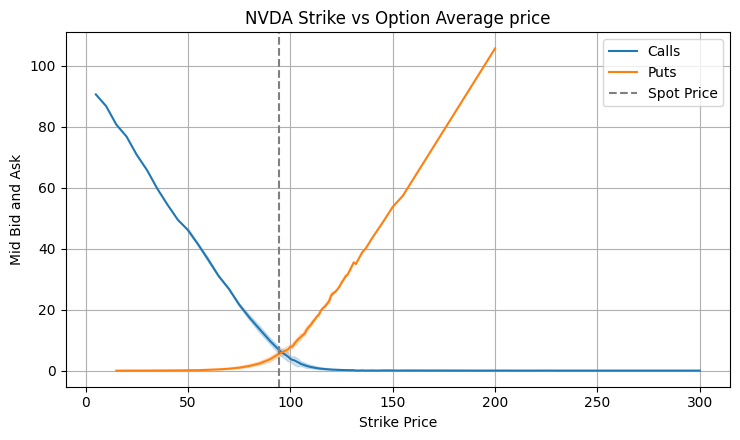

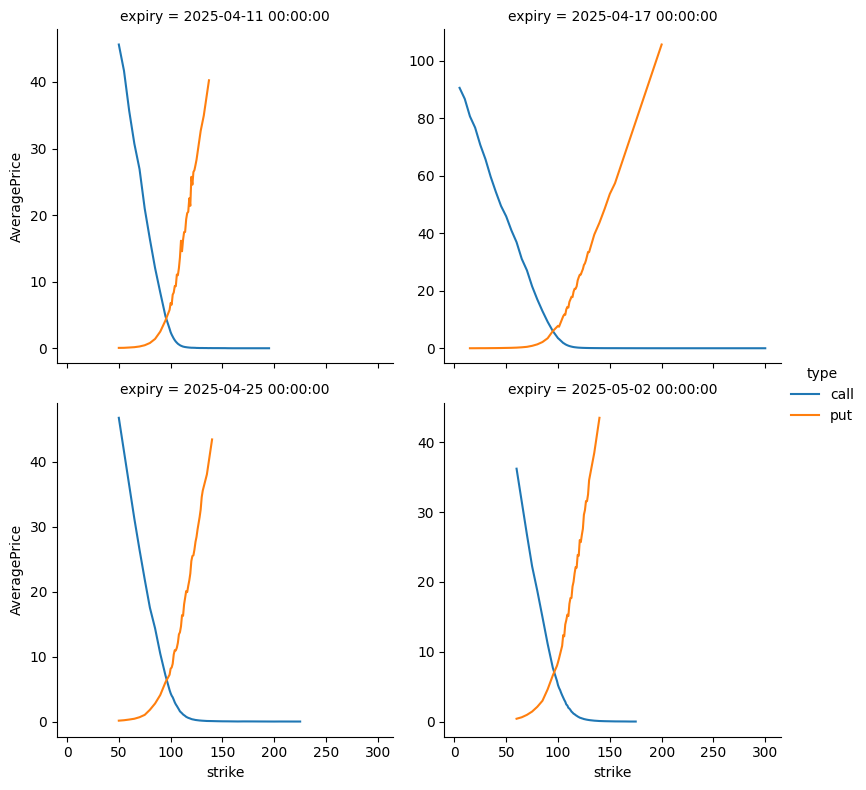

In [181]:
temp = nvda

plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='AveragePrice', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='AveragePrice', label='Puts')

spot = nvda['spot'].iloc[0]
plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"NVDA Strike vs Option Average price")
plt.xlabel("Strike Price")
plt.ylabel("Mid Bid and Ask")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
g = sns.FacetGrid(temp, col='expiry', hue='type', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'strike', 'AveragePrice').add_legend()

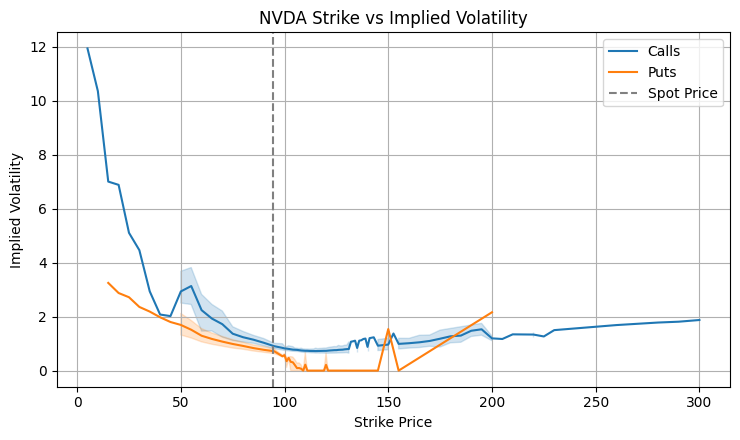

In [182]:
plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='impliedVolatility', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='impliedVolatility', label='Puts')

plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"NVDA Strike vs Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 750x450 with 0 Axes>

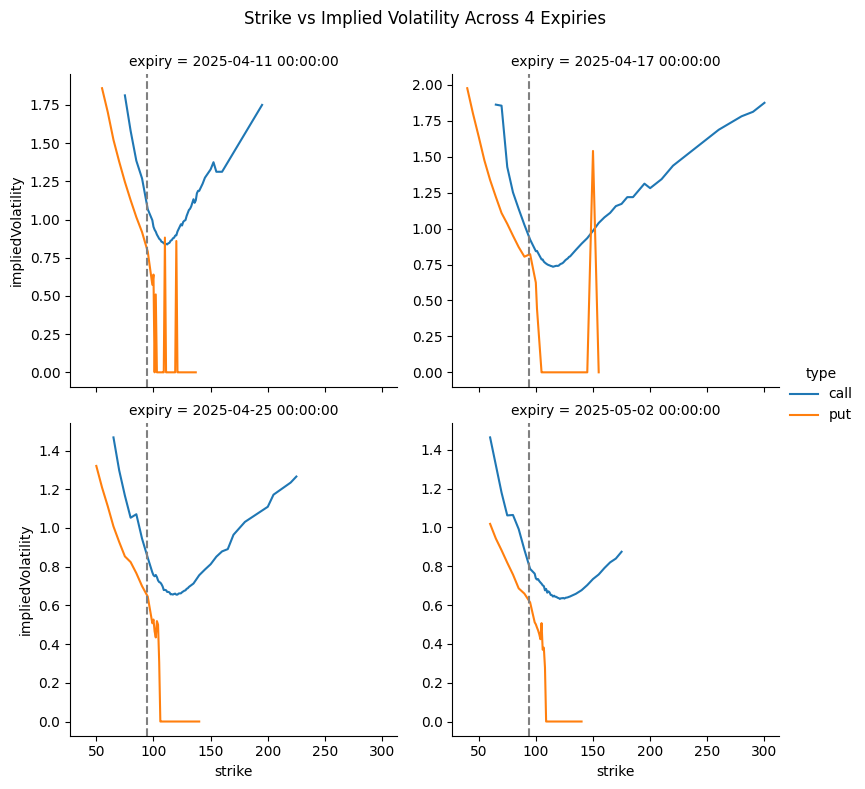

In [183]:
# from plot above, should filter spike noice at ends
nvda = nvda[(nvda["impliedVolatility"] > 0) & (nvda["impliedVolatility"]< 2)]

temp = nvda
plt.figure(figsize=(7.5, 4.5))
g = sns.FacetGrid(temp, col='expiry', col_wrap=2, height=4, sharey=False, hue='type')
g.map(sns.lineplot, 'strike', 'impliedVolatility').add_legend()
for ax in g.axes.flatten():
    ax.axvline(temp['spot'].iloc[0], color='gray', linestyle='--', label='Spot Price')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Strike vs Implied Volatility Across 4 Expiries')
plt.show()

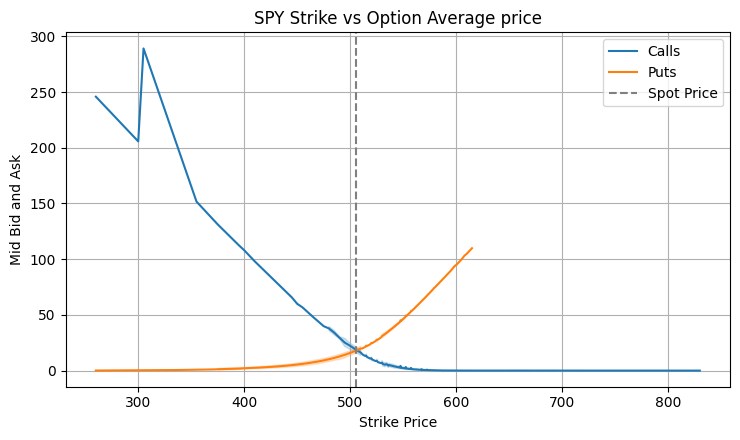

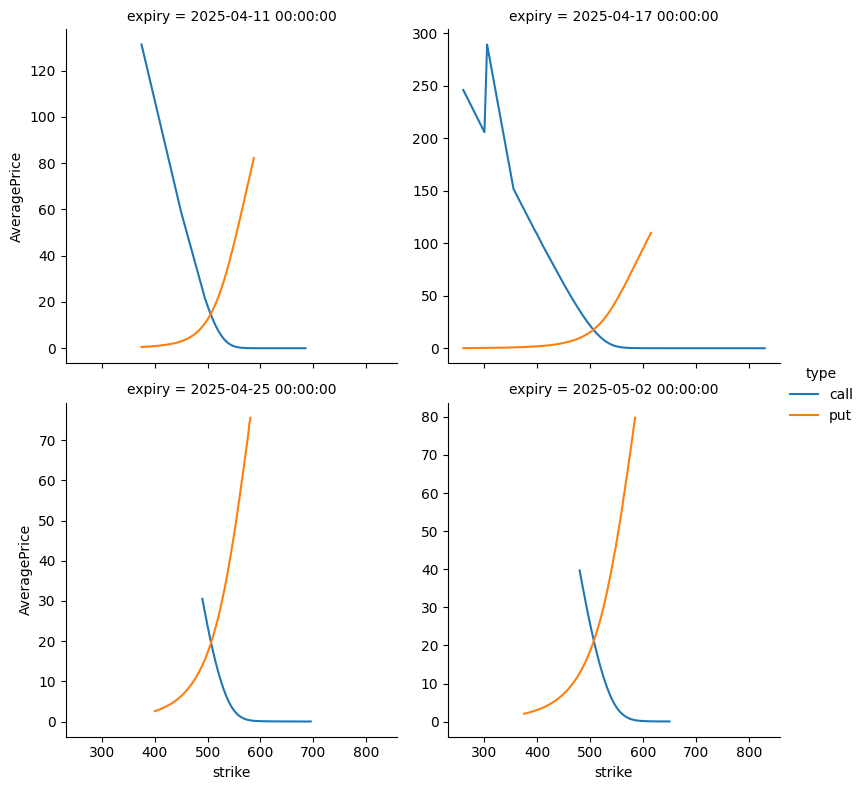

In [184]:
temp = spy

plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='AveragePrice', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='AveragePrice', label='Puts')

spot = spy['spot'].iloc[0]
plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"SPY Strike vs Option Average price")
plt.xlabel("Strike Price")
plt.ylabel("Mid Bid and Ask")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()
g = sns.FacetGrid(temp, col='expiry', hue='type', col_wrap=2, height=4, sharey=False)
g.map(sns.lineplot, 'strike', 'AveragePrice').add_legend()

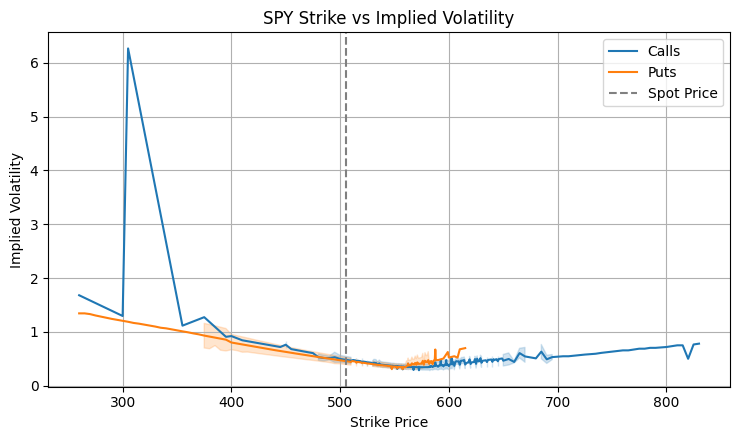

In [185]:
plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='impliedVolatility', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='impliedVolatility', label='Puts')

plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')

plt.title(f"SPY Strike vs Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Implied Volatility")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<Figure size 750x450 with 0 Axes>

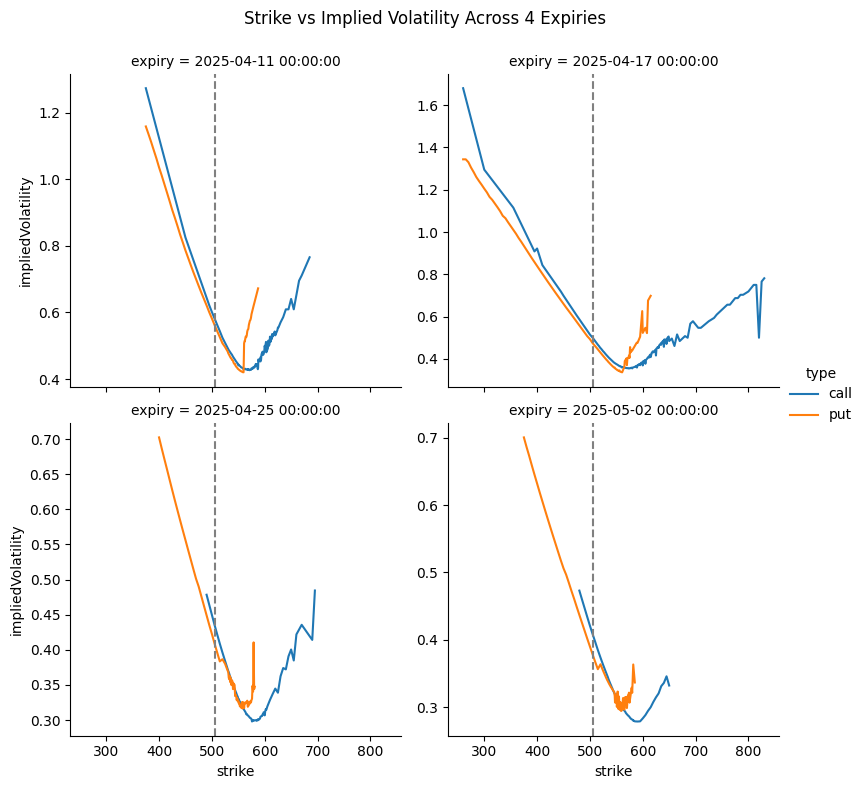

In [186]:
spy = spy[(spy["impliedVolatility"] > 0) & (spy["impliedVolatility"]< 2)]

temp = spy
plt.figure(figsize=(7.5, 4.5))
g = sns.FacetGrid(temp, col='expiry', col_wrap=2, height=4, sharey=False, hue='type')
g.map(sns.lineplot, 'strike', 'impliedVolatility').add_legend()
for ax in g.axes.flatten():
    ax.axvline(temp['spot'].iloc[0], color='gray', linestyle='--', label='Spot Price')
g.fig.subplots_adjust(top=0.9)
g.fig.suptitle('Strike vs Implied Volatility Across 4 Expiries')
plt.show()

<span style="font-size:30px; font-family:'Times new roman';">
Identify At-The-Money (ATM) Options 👀
</span>
<span style="font-size:15px; font-family:'Times new roman';">

At-the-money options are the most actively traded and have the highest time value which can imprement to do Strategy Analysis and testing the trinomial model performance
</span>

In [190]:
#spot = 94.30999755859376
nvda = nvda.copy()
nvda["strikeSpotRatio"] = nvda["strike"]/nvda["spot"]
atmNvda = nvda[(nvda["strikeSpotRatio"]>0.95) & (nvda["strikeSpotRatio"]<1.05)] # +- 5% range
atmNvdaCall = atmNvda[atmNvda["type"] == "call"]
atmNvdaPut = atmNvda[atmNvda["type"] == "put"]
display(atmNvda.head())

#spot = 505.279999
spy = spy.copy()
spy["strikeSpotRatio"] = spy["strike"]/spy["spot"]
atmSpy = spy[(spy["strikeSpotRatio"]>0.95) & (spy["strikeSpotRatio"]<1.05)] # +- 5% range
atmSpyCall = atmSpy[atmSpy["type"] == "call"]
atmSpyPut = atmSpy[atmSpy["type"] == "put"]
display(atmSpy.head())

,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield,AveragePrice,ttm,strikeSpotRatio
8,NVDA250411C00090000,2025-04-04 19:59:39+00:00,90.0,7.29,8.80,7.95,-5.16,-41.44578,8724.0,966,...,True,REGULAR,USD,call,2025-04-11,94.309998,0.04,8.375,0.010959,0.954300
9,NVDA250411C00095000,2025-04-04 19:59:59+00:00,95.0,4.25,5.30,4.35,-3.96,-48.23386,47815.0,9510,...,False,REGULAR,USD,call,2025-04-11,94.309998,0.04,4.825,0.010959,1.007316
10,NVDA250411C00099000,2025-04-04 19:59:59+00:00,99.0,3.09,3.10,2.75,-2.31,-42.77778,28908.0,845,...,False,REGULAR,USD,call,2025-04-11,94.309998,0.04,2.925,0.010959,1.049730
84,NVDA250411P00090000,2025-04-04 19:59:50+00:00,90.0,2.88,2.88,2.13,2.28,380.00003,65848.0,20130,...,False,REGULAR,USD,put,2025-04-11,94.309998,0.04,2.505,0.010959,0.954300
85,NVDA250411P00095000,2025-04-04 19:59:59+00:00,95.0,4.87,4.75,3.60,3.49,252.89853,60603.0,30437,...,True,REGULAR,USD,put,2025-04-11,94.309998,0.04,4.175,0.010959,1.007316


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,inTheMoney,contractSize,currency,type,expiry,spot,dividendYield,AveragePrice,ttm,strikeSpotRatio
19,SPY250411C00495000,2025-04-04 20:14:05+00:00,495.0,20.92,21.45,21.68,-23.699999,-53.115196,62.0,16,...,True,REGULAR,USD,call,2025-04-11,505.279999,1.28,21.565,0.010959,0.979655
20,SPY250411C00500000,2025-04-04 20:14:11+00:00,500.0,17.80,18.14,18.35,-22.380001,-55.699356,592.0,25,...,True,REGULAR,USD,call,2025-04-11,505.279999,1.28,18.245,0.010959,0.989550
21,SPY250411C00505000,2025-04-04 20:14:30+00:00,505.0,14.88,15.10,15.27,-20.219997,-57.606834,703.0,47,...,True,REGULAR,USD,call,2025-04-11,505.279999,1.28,15.185,0.010959,0.999446
22,SPY250411C00510000,2025-04-04 20:14:30+00:00,510.0,12.10,12.28,12.47,-22.550001,-65.079370,4514.0,12,...,False,REGULAR,USD,call,2025-04-11,505.279999,1.28,12.375,0.010959,1.009341
23,SPY250411C00515000,2025-04-04 20:14:05+00:00,515.0,9.46,9.78,9.94,-37.300000,-79.769035,5922.0,18,...,False,REGULAR,USD,call,2025-04-11,505.279999,1.28,9.860,0.010959,1.019237


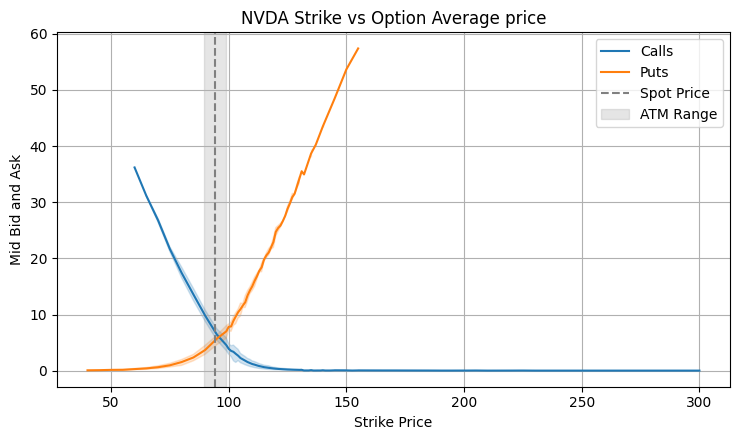

In [191]:
temp = nvda
plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='AveragePrice', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='AveragePrice', label='Puts')

spot = nvda['spot'].iloc[0]
plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')
plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='ATM Range')
plt.title(f"NVDA Strike vs Option Average price")
plt.xlabel("Strike Price")
plt.ylabel("Mid Bid and Ask")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

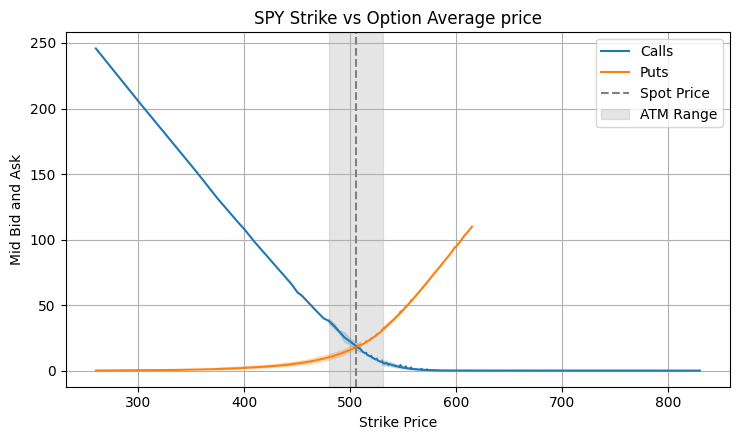

In [192]:
temp = spy
plt.figure(figsize=(7.5, 4.5))
sns.lineplot(data=temp[temp['type'] == 'call'], x='strike', y='AveragePrice', label='Calls')
sns.lineplot(data=temp[temp['type'] == 'put'], x='strike', y='AveragePrice', label='Puts')

spot = spy['spot'].iloc[0]
plt.axvline(spot, linestyle='--', color='gray', label='Spot Price')
plt.axvspan(spot * 0.95, spot * 1.05, color='gray', alpha=0.2, label='ATM Range')
plt.title(f"SPY Strike vs Option Average price")
plt.xlabel("Strike Price")
plt.ylabel("Mid Bid and Ask")
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

<span style="font-size:30px; font-family:'Times new roman';">
Create Final Cleaned DataFrame 💻
</span>
<span style="font-size:15px; font-family:'Times new roman';">

Need Type, Strike price, Time to maturity, Mid price, impliedVolatility, Spot price, Dividend Yield, Expiry
</span>

In [ ]:
modelNvda = nvda[['type', 'strike', 'ttm', 'AveragePrice', 'impliedVolatility', 'spot', 'dividendYield', 'expiry']].copy()

modelNvda = modelNvda.dropna()
modelNvda = modelNvda[(modelNvda['impliedVolatility'] > 0) & (modelNvda['ttm'] > 0)]
modelNvda.to_csv('../data/cleaned_options_nvda.csv', index=False)

modelSpy = spy[['type', 'strike', 'ttm', 'AveragePrice', 'impliedVolatility', 'spot', 'dividendYield', 'expiry']].copy()

modelSpy = modelSpy.dropna()
modelSpy = modelSpy[(modelSpy['impliedVolatility'] > 0) & (modelSpy['ttm'] > 0)]
modelSpy.to_csv('../data/cleaned_options_spy.csv', index=False)